In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, Nadam
from keras import regularizers
from keras import utils

In [2]:
PATH_TRAIN = "../processed_data/cleaned_data/clean_data.csv"
PATH_TEST = "../processed_data/cleaned_data/clean_test_data.csv"

train_df = pd.read_csv(PATH_TRAIN)
test_df = pd.read_csv(PATH_TEST)

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Train data shape: (13056, 91)
Test data shape: (3091, 91)


In [3]:
X_train_total = train_df.drop(["Participant_ID", "Depression"], axis=1)
y_train_total = train_df[["Participant_ID", "Depression", "Gender"]]

X_test = test_df.drop(["Participant_ID", "Depression"], axis=1)
y_test = test_df[["Participant_ID", "Depression", "Gender"]]

In [4]:
split_train = train_df[train_df['Participant_ID']<=460]
splt_val = train_df[train_df['Participant_ID']>460]

X_train = split_train.drop(["Participant_ID", "Depression"], axis=1)
y_train = split_train[["Participant_ID", "Depression", "Gender"]]

X_val = splt_val.drop(["Participant_ID", "Depression"], axis=1)
y_val = splt_val[["Participant_ID", "Depression", "Gender"]]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_val = scaler.transform(X_val)

In [6]:
utils.set_random_seed(3)
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.L2(0.001)))
model3.add(Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.0005)))
# model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.01)))
model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(1, activation="sigmoid"))
model3.summary()
model3.compile(loss="binary_crossentropy", optimizer = Adam(learning_rate=0.001),metrics=["accuracy"])
trained_model = model3.fit(X_scaled, np.array(y_train["Gender"]), 
                           epochs=25,batch_size=16, 
                           validation_data=(X_scaled_val, np.array(y_val["Gender"])),
                           class_weight = {0: 0.7, 1: 2})


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2880      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/25
703/703 [==============================] - 1s 541us/step - loss: 0.1921 - accuracy: 0.9533 - val_loss: 0.4959 - val_accuracy: 0.9956
Epoch 2/25
703/703 [==============================] - 0s 441us/step - loss: 0.0582 - accuracy: 0.9984 - val_loss: 0.3150 - val_accuracy: 0.9989
Epoch 3/25
703/703 [==============================] - 0s 507us/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 0.3564 - val_accuracy: 0.9983
Epoch 4/25
703/703 [==============================] - 0s 437us/step - loss: 0.0286 - accuracy: 1.0000 - val_loss: 0.2550 - val_accuracy: 0.9983
Epoch 5/25
703/703 [==============================] - 0s 501us/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.1745 - val_accuracy: 0.9983
Epoch 6/25
703/703 [==============================] - 0s 441us/step - loss: 0.0196 - accuracy: 0.9987 - val_loss: 0.1990 - val_accuracy: 0.9972
Epoch 7/25
703/703 [==============================] - 0s 518us/step - loss: 0.0179 - accuracy: 0.9988 - val_loss: 0.1018 - val_accuracy:

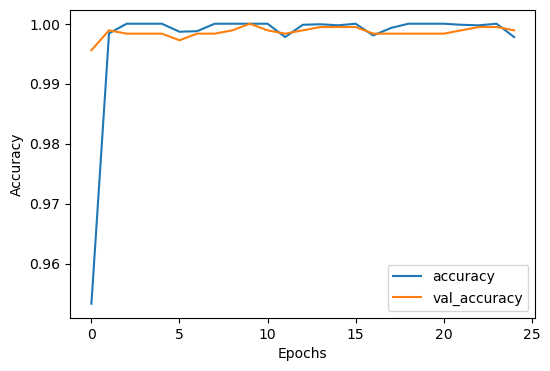

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(trained_model.history["accuracy"], label="accuracy")
plt.plot(trained_model.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Test data performance

In [8]:
scaler = StandardScaler()
X_scaled_total = scaler.fit_transform(X_train_total)
X_scaled_test = scaler.transform(X_test)

In [9]:
utils.set_random_seed(3)
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.L2(0.001)))
model3.add(Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.0005)))
# model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.01)))
model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(1, activation="sigmoid"))
model3.summary()
model3.compile(loss="binary_crossentropy", optimizer = Adam(learning_rate=0.001),metrics=["accuracy"])
trained_model = model3.fit(X_scaled_total, np.array(y_train_total["Gender"]), 
                           epochs=25,batch_size=16,
                           class_weight = {0: 0.7, 1: 2})

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                2880      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/25
816/816 [==============================] - 1s 389us/step - loss: 0.1732 - accuracy: 0.9600
Epoch 2/25
816/816 [==============================] - 0s 367us/step - loss: 0.0533 - accuracy: 0.9992
Epoch 3/25
816/816 [==============================] - 0s 420us/step - loss: 0.0381 - accuracy: 0.9995
Epoch 4/25
816/816 [==============================] - 0s 369us/step - loss: 0.0285 - accuracy: 0.9998
Epoch 5/25
816/816 [==============================] - 0s 419us/step - loss: 0.0243 - accuracy: 0.9991
Epoch 6/25
816/816 [==============================] - 0s 367us/step - loss: 0.0185 - accuracy: 0.9997
Epoch 7/25
816/816 [==============================] - 0s 423us/step - loss: 0.0125 - accuracy: 1.0000
Epoch 8/25
816/816 [==============================] - 0s 367us/step - loss: 0.0138 - accuracy: 0.9991
Epoch 9/25
816/816 [==============================] - 0s 431us/step - loss: 0.0165 - accuracy: 0.9988
Epoch 10/25
816/816 [==============================] - 0s 366us/step - loss: 0.010

In [10]:
y_pred = model3.predict(X_scaled_test)
y_test["Gender_predicted"] = np.where(y_pred>=0.5,1,0)

97/97 [==============================] - 0s 275us/step


/var/folders/6m/wg76ryq57fnb356nt5xwlbl80000gn/T/ipykernel_10217/4191948966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Gender_predicted"] = np.where(y_pred>=0.5,1,0)


In [11]:
y_test

,Participant_ID,Depression,Gender,Gender_predicted
0,474,0,1,1
1,474,0,1,1
2,474,0,1,1
3,474,0,1,1
4,474,0,1,1
...,...,...,...,...
3086,479,0,1,1
3087,479,0,1,1
3088,479,0,1,1
3089,479,0,1,1


Accuracy: 1.0
Balanced Accuracy: 1.0


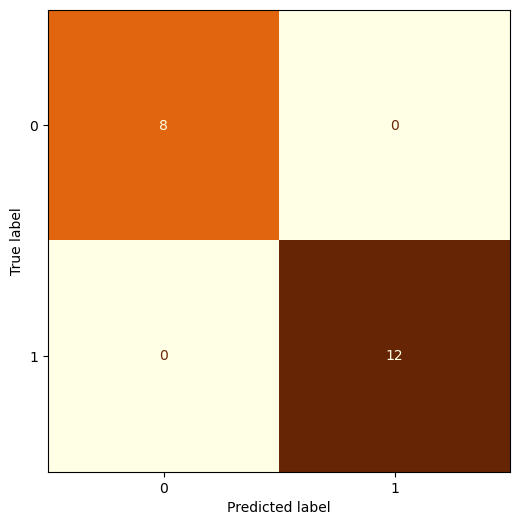

In [12]:
acc, bal_acc = compute_metrics(y_test)
print(f"Accuracy: {acc}")
print(f"Balanced Accuracy: {bal_acc}")
show_conf_matrix(y_test)